# Sugarcane Leaf Disease Detection

In [1]:
#Data Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

#Sharpening of images
from skimage.io import imshow, imread
from skimage.color import rgb2yuv, rgb2hsv, rgb2gray, yuv2rgb, hsv2rgb
from scipy.signal import convolve2d

#Preprocessing of Images
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

#Buliding Model
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

#Accuracy
from sklearn.metrics import classification_report

c:\Users\Chaimaa\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,


In [2]:

# Local path to your dataset directory
data_dir = r'C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset'

# List the categories (subfolders) in the dataset directory
categories = os.listdir(data_dir)

# Print the list of categories
print(categories)


['Healthy', 'Mosaic', 'RedRot', 'Rust', 'Yellow']


In [3]:
labels=[i for i in range(len(categories))]
labels

[0, 1, 2, 3, 4]

#### Making a dictionary with Classes as Keys and Indices as Values

In [4]:
label_dict=dict(zip(categories, labels))
label_dict

{'Healthy': 0, 'Mosaic': 1, 'RedRot': 2, 'Rust': 3, 'Yellow': 4}

In [5]:
data_list=[] #data_list- storing the images
labels_list=[] #label_list - storing the class labels

In [6]:

data1=r"C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset\Healthy"
data2=r"C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset\Mosaic"
data3=r"C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset\RedRot"
data4=r"C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset\Rust"
data5=r"C:\Users\Chaimaa\Documents\ensias\2A\S4\deep learning\projet\Sugarcane-Leaf-Disease\Sugarcane_Leaf_Disease_Dataset\Yellow"
count_healthy=0
count_Mosaic=0
count_RedRot=0
count_Rust=0
count_Yellow=0


In [7]:
for i in os.listdir(data1):
        img_path=os.path.join(data1, i)
        count_healthy=count_healthy+1

In [8]:
for i in os.listdir(data2):
        img_path=os.path.join(data2, i)
        count_Mosaic=count_Mosaic+1

In [9]:
for i in os.listdir(data3):
        img_path=os.path.join(data3, i)
        count_RedRot=count_RedRot+1

In [10]:
for i in os.listdir(data4):
        img_path=os.path.join(data4, i)
        count_Rust=count_Rust+1

In [11]:
for i in os.listdir(data5):
        img_path=os.path.join(data5, i)
        count_Yellow=count_Yellow+1

In [12]:
count_healthy,count_Mosaic,count_RedRot,count_Rust,count_Yellow

(522, 462, 518, 514, 505)

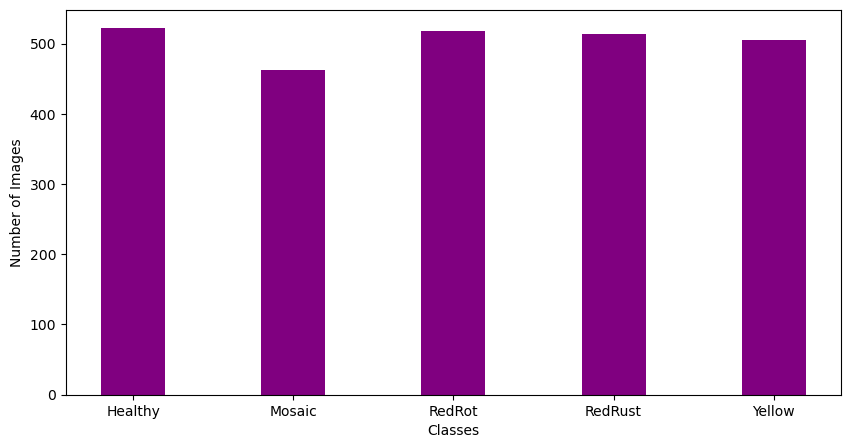

In [13]:
fig = plt.figure(figsize = (10, 5))
classes=["Healthy","Mosaic","RedRot", "RedRust","Yellow"]
values=[count_healthy,count_Mosaic,count_RedRot,count_Rust,count_Yellow]
#creating the bar plot
plt.bar(classes, values, color ='purple',
        width = 0.4)
 
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

In [14]:
sharpen = np.array([[0, -1, 0],
                    [-1, 5, -1],
                    [0, -1, 0]])


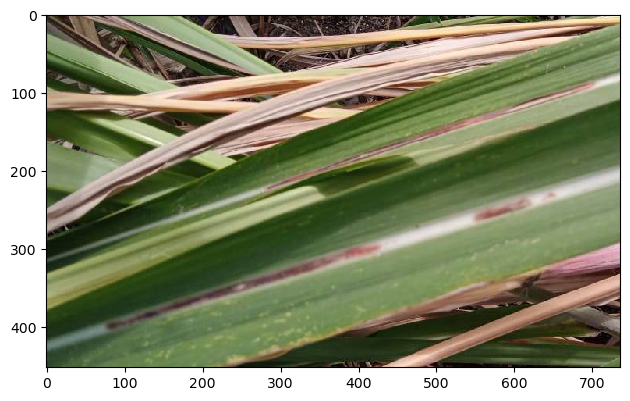

In [15]:

og_image = imread(data_dir+'/RedRot/redrot (1).jpeg')
imshow(og_image);

#### Performing convolution operations on an image. 

In [16]:
def multi_convolver(image, kernel, iterations):
    for i in range(iterations):
        image = convolve2d(image, kernel, 'same', boundary = 'fill',
                           fillvalue = 0)
    return image

In [17]:
def convolver_rgb(image, kernel, iterations = 1):
    img_yuv = rgb2yuv(image)   
    img_yuv[:,:,0] = multi_convolver(img_yuv[:,:,0], kernel, 
                                     iterations)
    final_image = yuv2rgb(img_yuv)
    return final_image


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


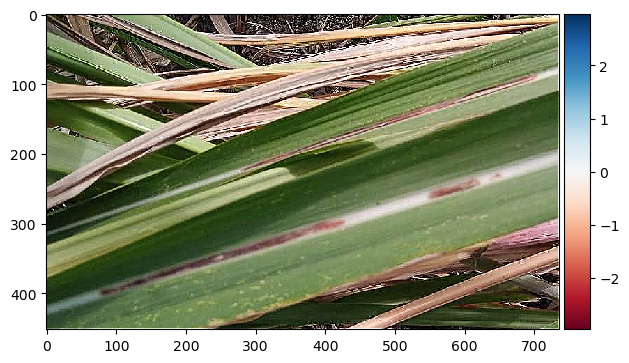

In [18]:
final_image = convolver_rgb(og_image, sharpen, iterations = 1)
imshow(final_image);
     

#### Image Preprocessing

In [19]:
from PIL import Image

for i in categories:
    folder_path = os.path.join(data_dir, i)  # path to each disease folder
    img_names = os.listdir(folder_path)       # all images in each disease folder
    
    for img_name in img_names:
        img_path = os.path.join(folder_path, img_name)
        
        # Skip processing if it's a macOS .DS_Store file
        if img_name == '.DS_Store':
            continue
        
        img = Image.open(img_path)
        img = img.resize((224, 224))
        img = np.array(img)
        img = convolver_rgb(img, sharpen, iterations=1)
        
        data_list.append(img)
        labels_list.append(label_dict[i])


In [20]:
data_list[0].shape

(224, 224, 3)

In [21]:
lb = LabelEncoder()
labels_list = lb.fit_transform(labels_list)
labels_list = to_categorical(labels_list)
     

In [22]:
data = np.array(data_list)
labels = np.array(labels_list)
print("Done")
print(data.shape)

Done
(2521, 224, 224, 3)


#### Visualizing Images in the Dataset after Preprocessing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

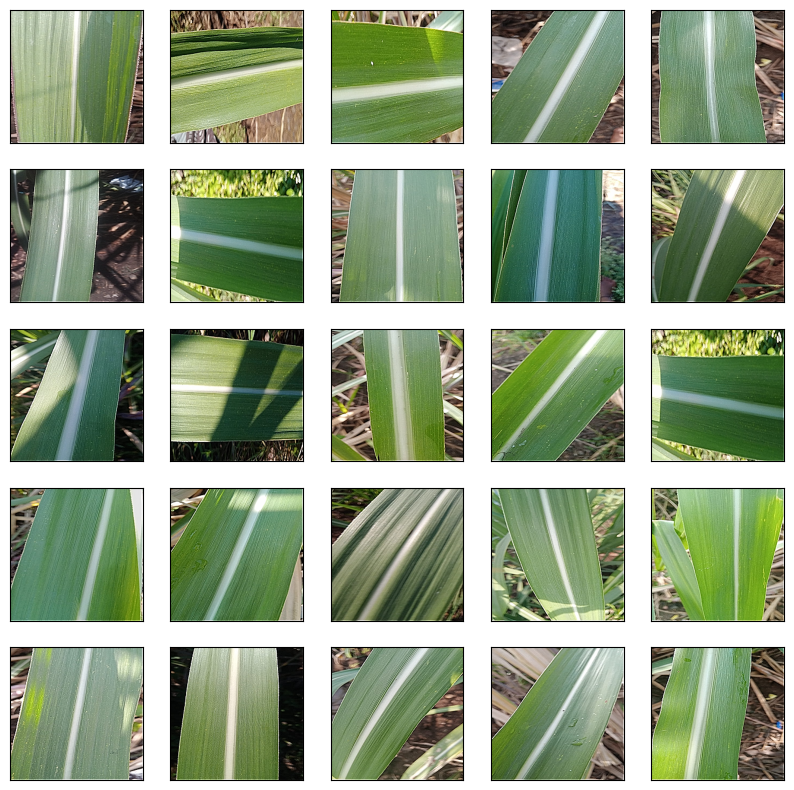

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data[np.random.randint(224)], cmap=plt.cm.binary)
    
plt.show()

#### Image Augmentation

In [24]:
aug = ImageDataGenerator(
	rotation_range=20,
	zoom_range=0.15,
	width_shift_range=0.2,
	height_shift_range=0.2,
	shear_range=0.15,
	horizontal_flip=True,
	fill_mode="nearest")

#### Splitting Dataset into Train and Test Sets

In [25]:
(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.20, stratify=labels, random_state=42)

In [26]:
print( trainX.shape, testX.shape, trainY.shape, testY.shape)

(2016, 224, 224, 3) (505, 224, 224, 3) (2016, 5) (505, 5)


#### The model

In [27]:
from keras.applications.densenet import DenseNet201
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense ,Dropout
from keras.layers import Input

#### DenseNet : Densely Connected Convolutional Networks

###### The key idea behind DenseNet is dense connectivity, where each layer is connected to every other layer in a feed-forward fashion. This dense connectivity pattern differs from traditional CNN architectures where each layer is connected only to the subsequent layer. Dense connections facilitate feature reuse and encourage feature propagation throughout the network, leading to improved gradient flow, feature propagation, and feature reuse.

In [28]:
from tensorflow.keras.regularizers import l2 

In [29]:

base_model = DenseNet201(include_top=False,
                         input_shape=(224,224,3),
                         weights='imagenet',
                         pooling="avg"
                     )



74836368/74836368 [==============================] - 5s 0us/step


In [30]:

base_model.trainable = False 
image_input = Input(shape=(224, 224, 3))

x = base_model(image_input,training = False)

x = Dense(256,activation = "relu")(x)
x = Dropout(0.2)(x)

x = Dense(128,activation = "relu")(x)
x = Dropout(0.2)(x)

image_output = Dense(5,kernel_regularizer=l2(0.01),activation="softmax")(x) #output layer
#kernel Regulariser- SVM

model = Model(image_input,image_output)
model.compile(optimizer="adam",loss="squared_hinge",metrics=["accuracy"])
#loss function is square hinged- SVM
     

In [31]:
from tensorflow.keras.utils import plot_model


In [32]:
#plot_model(base_model, to_file = 'Densenet.png', show_shapes = True, show_layer_names = True) 


#### Training the Model

In [33]:
BS=32
EPOCHS=10

In [34]:
history = model.fit(
	aug.flow(trainX, trainY, batch_size=BS),
	steps_per_epoch=len(trainX) // BS,
	validation_data=(testX, testY),
	validation_steps=len(testX) // BS,
	epochs=EPOCHS) 

Epoch 1/10


63/63 [==============================] - 78s 1s/step - loss: 1.2204 - accuracy: 0.5243 - val_loss: 1.0530 - val_accuracy: 0.7723
Epoch 2/10
63/63 [==============================] - 65s 1s/step - loss: 1.0722 - accuracy: 0.7391 - val_loss: 0.9986 - val_accuracy: 0.8376
Epoch 3/10
63/63 [==============================] - 65s 1s/step - loss: 1.0166 - accuracy: 0.7941 - val_loss: 0.9730 - val_accuracy: 0.8337
Epoch 4/10
63/63 [==============================] - 68s 1s/step - loss: 0.9830 - accuracy: 0.8224 - val_loss: 0.9577 - val_accuracy: 0.8614
Epoch 5/10
63/63 [==============================] - 68s 1s/step - loss: 0.9700 - accuracy: 0.8284 - val_loss: 0.9712 - val_accuracy: 0.8337
Epoch 6/10
63/63 [==============================] - 67s 1s/step - loss: 0.9609 - accuracy: 0.8348 - val_loss: 0.9414 - val_accuracy: 0.8574
Epoch 7/10
63/63 [==============================] - 66s 1s/step - loss: 0.9442 - accuracy: 0.8542 - val_loss: 0.9209 - val_accuracy: 0.8851
Epoch 8/10
63/63 [

In [35]:

print("[INFO] evaluating network...")
predIdxs = model.predict(testX, batch_size=BS)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(testY.argmax(axis=1), predIdxs))

[INFO] evaluating network...
16/16 [==============================] - 15s 774ms/step
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       105
           1       0.92      0.71      0.80        92
           2       0.90      0.88      0.89       104
           3       0.88      0.95      0.91       103
           4       0.94      0.77      0.85       101

    accuracy                           0.86       505
   macro avg       0.88      0.86      0.86       505
weighted avg       0.88      0.86      0.86       505



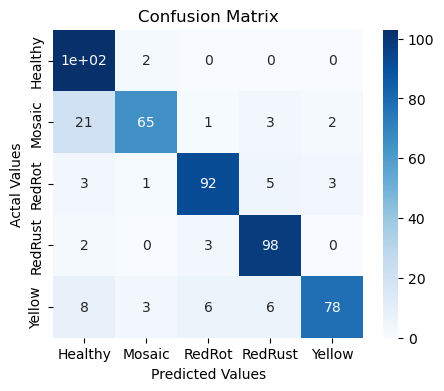

In [36]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(testY.argmax(axis=1), predIdxs)


cm_df = pd.DataFrame(cm,
                     index = ["Healthy","Mosaic","RedRot", "RedRust","Yellow"], 
                     columns = ["Healthy","Mosaic","RedRot", "RedRust","Yellow"])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

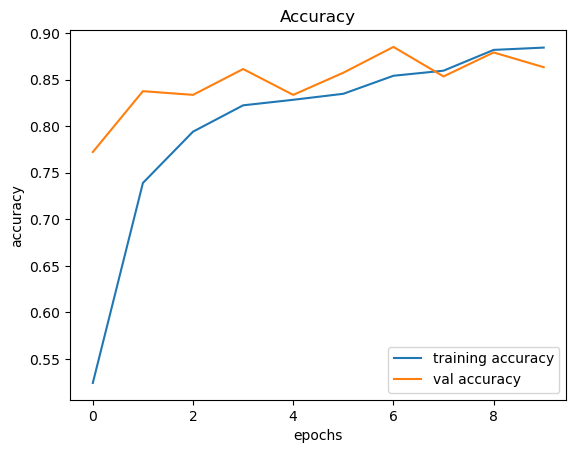

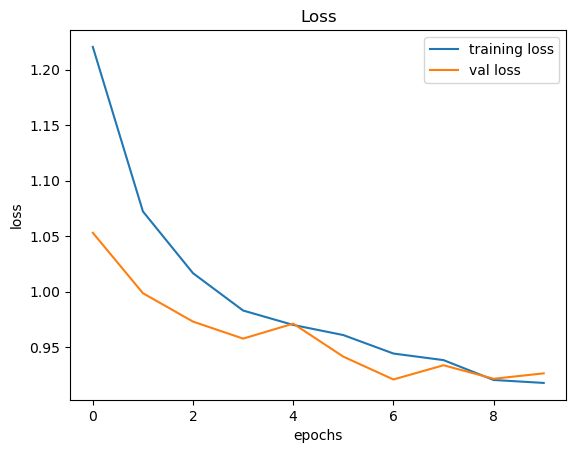

In [37]:
import matplotlib.pyplot as plt
plt.figure(0)

plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

#### Making the Predictions

In [48]:
from keras.preprocessing import image

img = image.load_img("../media/healthy (10).jpeg", target_size=(224,224))
x = image.img_to_array(img)
x=x/255
img = convolver_rgb(img, sharpen, iterations = 1)
x=x.reshape(224,224,3)
x = np.expand_dims(x, axis=0)


predi=model.predict(x)
print(predi)
classes_x=np.argmax(predi)    
print(classes_x)

classes=["Healthy","Mosaic","RedRot", "RedRust","Yellow"]  
prediction_label=prediction_label=classes[classes_x]
if(prediction_label=="Healthy"):
  print("It is a Healthy Leaf")
else:
  print("Disease detected: "+prediction_label)

1/1 [==============================] - 0s 205ms/step
[[9.81244028e-01 1.74673907e-02 4.39685013e-04 1.14733695e-04
  7.34066707e-04]]
0
It is a Healthy Leaf
